## AUTO Assignment part 2

 Use the Auto MPG dataset auto-mpg.data,
available at https://archive.ics.uci.edu/ml/datasets/Auto+MPG and
perform the following tasks programmatically in a Jupyter
notebook:
a. [Marks: 0%] Drop the name and origin attributes.
b. [Marks: 5%] Attribute horsepower has 6 missing values. Fill
these up with the average horsepower for the respective
number of cylinders.
c. [Marks: 5%] The year attribute has two digits. Add 1900 so
that the year has four digits. For example, in the dataset “70”
really means “1970”, so you need to change the value from
70 to 1970.
d. [Marks: 0%] Split the data into 50% training and 50%
validation sets.
e. [Marks: 5%] Train a keras.models.Sequential DNN that
predicts the mpg of vehicles.
f. [Marks: 5%] Use your DNN from Part e) to predict the mpg
of the following vehicles:
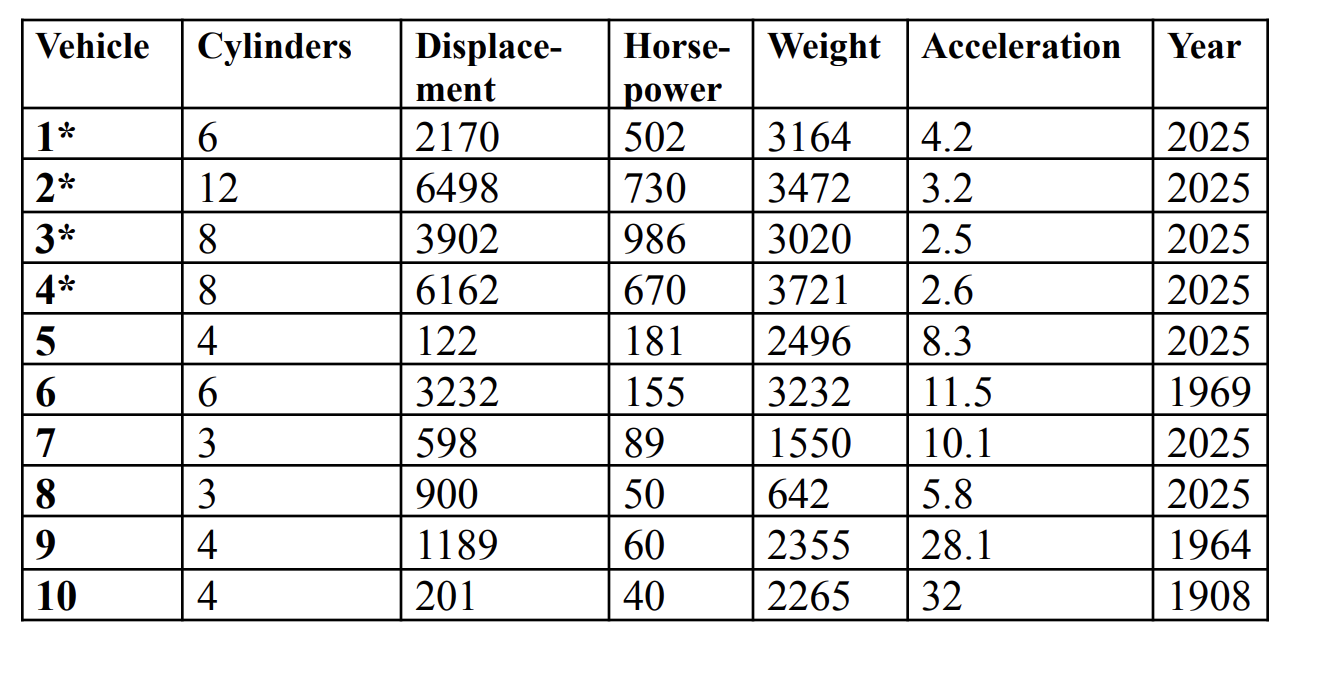

g. [Marks: 20%]Prepare an approx. 10-minute video explaining
your code as well as identifying the parts of the code that you
authored and the parts written by someone else, along with
references. Make sure the font in your video is large enough
and legible

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']


df = pd.read_csv('auto+mpg/auto-mpg.data', 
                 sep='\s+', 
                 names=columns)

print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [21]:
df = df.drop(['origin', 'car_name'], axis=1)

In [22]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
dtype: object


In [23]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64


In [24]:
zeros_df = df[df['horsepower'] == 0]

In [25]:
zeros_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year


In [26]:
# Finds both the number 0 and the text "0"
zeros = df[df['horsepower'].astype(str) == "0"]



In [27]:
zeros

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year


In [28]:
# errors='coerce' turns unparseable strings (like "N/A") into actual NaN values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # used AI for this function since other were not working


has_zero = df['horsepower'] == 0
has_na = df['horsepower'].isna()

In [29]:
# This tells Pandas: "Show me every row where has_zero is True"
only_zeros = df[has_na]
print(only_zeros)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN  2046.0          19.0   
126  21.0          6         200.0         NaN  2875.0          17.0   
330  40.9          4          85.0         NaN  1835.0          17.3   
336  23.6          4         140.0         NaN  2905.0          14.3   
354  34.5          4         100.0         NaN  2320.0          15.8   
374  23.0          4         151.0         NaN  3035.0          20.5   

     model_year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82  


In [30]:
# This 'maps' the average of each group back to the original rows
df['horsepower'] = df['horsepower'].fillna(
    df.groupby('cylinders')['horsepower'].transform('mean')
)

In [31]:
# This tells Pandas: "Show me every row where has_zero is True"
only_zeros = df[has_na]
print(only_zeros.round(2))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0       78.28  2046.0          19.0   
126  21.0          6         200.0      101.51  2875.0          17.0   
330  40.9          4          85.0       78.28  1835.0          17.3   
336  23.6          4         140.0       78.28  2905.0          14.3   
354  34.5          4         100.0       78.28  2320.0          15.8   
374  23.0          4         151.0       78.28  3035.0          20.5   

     model_year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82  


In [32]:
import pandas as pd


def fix_year_format(val):

    # Define 'year' by converting the input to an integer
    year = int(val)
    
    # If the year is two digits (0-99), add 1900
    if 0 <= year < 100:
        return year + 1900
    
    # Return as is if it's already 1970, 2024, etc.
    return year

df['model_year'] = df['model_year'].apply(fix_year_format)

# Verify the results
print("Unique years in dataset:")
print(df['model_year'].unique())



Unique years in dataset:
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982]


In [33]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
393,27.0,4,140.0,86.0,2790.0,15.6,1982
394,44.0,4,97.0,52.0,2130.0,24.6,1982
395,32.0,4,135.0,84.0,2295.0,11.6,1982
396,28.0,4,120.0,79.0,2625.0,18.6,1982
397,31.0,4,119.0,82.0,2720.0,19.4,1982


In [34]:
X = df.drop('mpg', axis=1)
y = df['mpg']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")


Training set size: 199
Validation set size: 199


In [36]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X.columns)]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae', 
    metrics=['mae', 'mse']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

print("Model training complete.")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 144.4777 - mae: 144.4777 - mse: 28195.7188 - val_loss: 36.1324 - val_mae: 36.1324 - val_mse: 1796.1632
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.2606 - mae: 53.2606 - mse: 4571.8330 - val_loss: 49.6437 - val_mae: 49.6437 - val_mse: 2735.5208
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.4471 - mae: 34.4471 - mse: 1547.0114 - val_loss: 14.5502 - val_mae: 14.5502 - val_mse: 321.3899
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.4512 - mae: 17.4512 - mse: 455.7714 - val_loss: 24.0115 - val_mae: 24.0115 - val_mse: 839.5378
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.6975 - mae: 25.6975 - mse: 920.9150 - val_loss: 9.5159 - val_mae: 9.5159 - val_mse: 161.1842
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.6180 - mae: 16.6180 - mse: 414.6723 - val_loss: 8.9052 - val_mae: 8.9052 - val_mse: 151.1944
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1140 

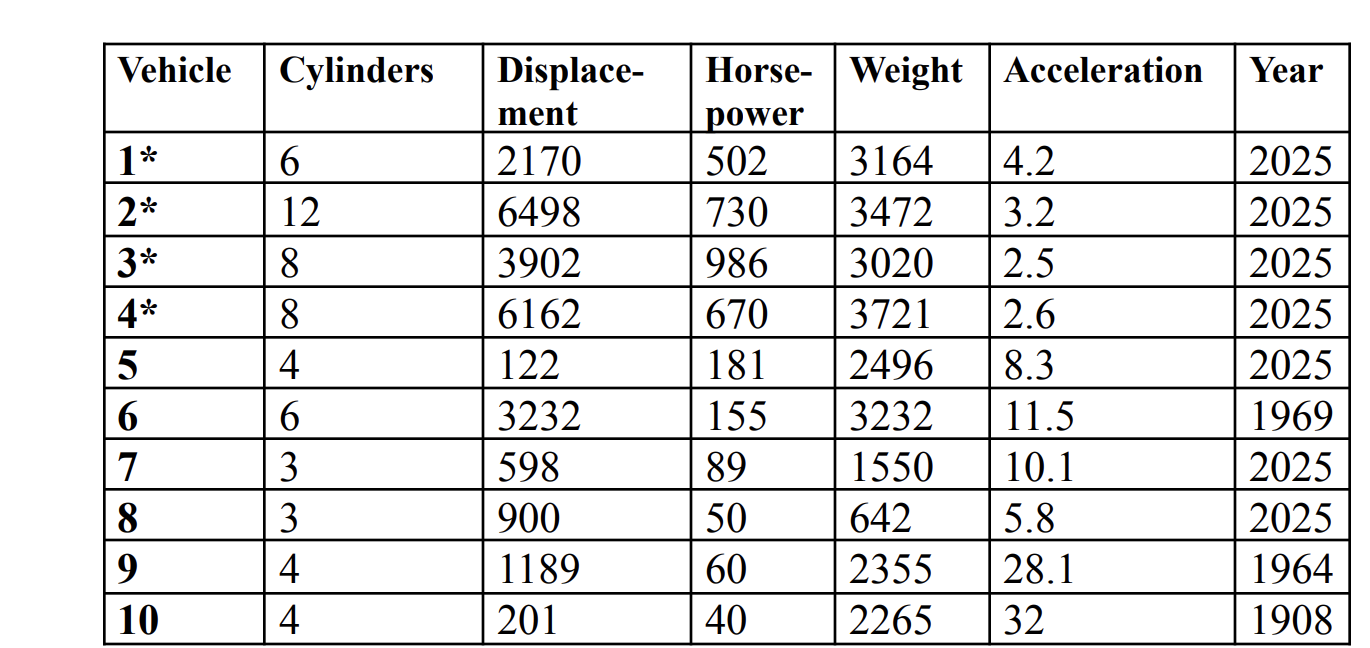

In [46]:
# create a dictionary 
new_vehicles_data = {
    'Cylinders': [6, 12, 8, 8,4,6,3,3,4,4],
    'Displacement': [2170, 6498, 3902, 6162,122,3232,598,900,1189,201],
    'Horsepower': [502, 730, 986, 670, 181, 155, 89,50,60,40],
    'Weight': [3164, 3472, 3020, 3721, 2496,3232, 1550,642,2355,2265],
    'Acceleration': [4.2, 3.2, 2.5, 2.6, 8.3, 11.5,10.1, 5.8,28.1,32 ],
    'Year': [2025, 2025, 2025, 2025, 2025,1969 ,2025, 2025,1964,1908]
}
new_vehicles_data
new_vehicles_df = pd.DataFrame(new_vehicles_data)

# Predict
predictions = model.predict(new_vehicles_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [48]:
predictions.round(2)

array([[118.13],
       [413.61],
       [248.7 ],
       [415.96],
       [ 11.17],
       [223.34],
       [ 39.65],
       [ 78.75],
       [ 52.76],
       [ 33.52]], dtype=float32)